In [1]:
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')


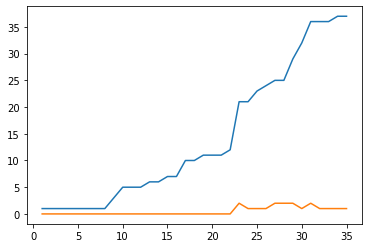

In [3]:
df = df[df['city']=='Ivinhema']
plt.plot(df.day,df.cases)
plt.plot(df.day,df.avg7_cases)
# plt.plot(df.day,df.deaths)

In [4]:
df.tail()

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
104583,2020-06-24,MS,Ivinhema,city,36,0,31,False,23187,5004700,...,0.0,1.553,0.0,0.173,0.0,2,0,0.0,0.092,0.0
104584,2020-06-25,MS,Ivinhema,city,36,0,32,False,23187,5004700,...,0.0,1.553,0.0,0.000,0.0,1,0,0.0,0.080,0.0
104585,2020-06-26,MS,Ivinhema,city,36,0,33,False,23187,5004700,...,0.0,1.553,0.0,0.000,0.0,1,0,0.0,0.074,0.0
104586,2020-06-28,MS,Ivinhema,city,37,0,34,False,23187,5004700,...,0.0,1.596,0.0,0.043,0.0,1,0,0.0,0.074,0.0
104587,2020-06-29,MS,Ivinhema,city,37,0,35,True,23187,5004700,...,0.0,1.596,0.0,0.000,0.0,1,0,0.0,0.074,0.0


In [5]:
df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df['date'] = df['date'].astype('datetime64[ns]')


In [6]:
df = df[df['country']=='Brazil']
df.tail()

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recovery_day_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million,perc_death,perc_recovery,active_cases
2632,Brazil,2020-06-25,1228114,54971,679524,121,39483.0,1141,19055,-7.59,...,90.3,35710.0,1031.0,20706.0,169.214,4.871,98.114,4.48,55.33,493619
2633,Brazil,2020-06-26,1274974,55961,702399,122,46860.0,990,22875,18.68,...,108.4,34580.0,1001.0,21538.0,163.857,4.729,102.057,4.39,55.09,516614
2634,Brazil,2020-06-27,1313667,57070,727715,123,38693.0,1109,25316,-17.43,...,120.0,35155.0,1013.0,21562.0,166.571,4.800,102.171,4.34,55.40,528882
2635,Brazil,2020-06-28,1344143,57622,746018,124,30476.0,552,18303,-21.24,...,86.7,37257.0,1004.0,22557.0,176.529,4.757,106.886,4.29,55.50,540503
2636,Brazil,2020-06-29,1368195,58314,757811,125,24052.0,692,11793,-21.08,...,55.9,37389.0,1006.0,22296.0,177.157,4.771,105.657,4.26,55.39,552070


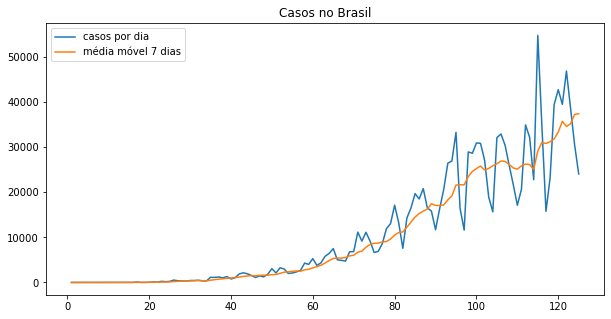

In [7]:
plt.figure(figsize=(10,5))
plt.title('Casos no Brasil')
plt.plot(df.day,df.case_day, label='casos por dia')
plt.plot(df.day,df.avg7_cases, label='média móvel 7 dias')
plt.legend()

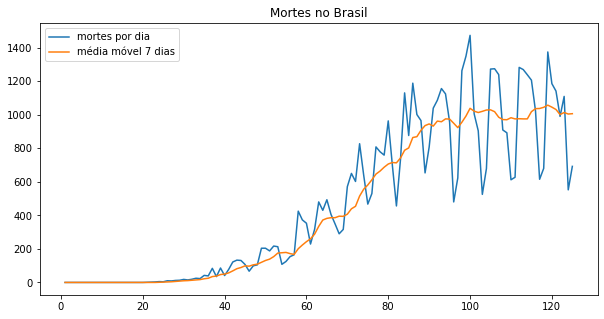

In [8]:
plt.figure(figsize=(10,5))
plt.title('Mortes no Brasil')
plt.plot(df.day,df.death_day, label='mortes por dia')
plt.plot(df.day,df.avg7_deaths, label='média móvel 7 dias')
plt.legend()